In [8]:
import pandas as pd
import matplotlib.pyplot as plt

TARGET_URL = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [2]:
def crawl_sp500_companies():
    tables = pd.read_url(TARGET_URL)
    return tables[0]["Symbol"].tolist()

In [3]:
def read_data(data_path):
    df = pd.read_csv(data_path)
    df.drop("Unnamed: 0", axis=1, inplace=True)
    return df

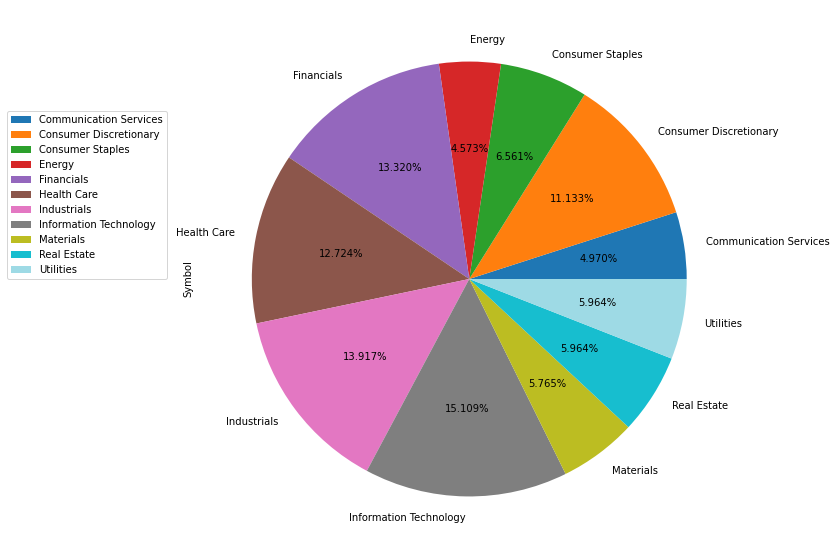

In [9]:
# Plot industry distribution 
sp500 = read_data("data/sp500_comp_info.csv")
sp500.groupby("GICS Sector").count().plot.pie(y="Symbol", figsize=(10, 10), autopct='%1.3f%%', colormap="tab20")
plt.legend(loc=(-0.35, 0.5))

In [ ]:
# visualizing current constituents entrance time
qb = QuantBook()
for symbol in crawl_sp500_companies():
    qb.AddEquity(symbol)
history = qb.History(qb.Securities.Keys, 1800, Resolution.Daily)
symbol_date_pair = list(history.index)

def collect_date(pair): # collect all unique dates
    date_list = []
    for p in pair:
        if p[1] not in date_list:
            date_list.append(p[1])
    return date_list

def count_stock(date_list, pair):
    date_stock_dict = {}
    for d in date_list: # initialize the dictionary
        date_stock_dict[d] = 0
    for p in pair:
        date_stock_dict[p[1]] += 1
    return date_stock_dict

date_list = collect_date(symbol_date_pair)
date_stock_dict = count_stock(date_list, symbol_date_pair)
stock_num_df = pd.DataFrame(date_stock_dict, index=list(range(1)))
stock_num_df = stock_num_df.T
stock_num_df.columns = ["Count"]
stock_num_df.plot.line(y="Count", xlabel="Date", ylabel="Stock Count")

In [ ]:
# visualizing pair prices using original price
def plot_pair_price(stock1, stock2, back_days):
    # retriving data and setting up the dataframe
    qb = QuantBook()
    qb.AddEquity(stock1)
    qb.AddEquity(stock2)
    history = qb.History(qb.Securities.Keys, back_days, Resolution.Daily)
    history = history.reset_index()
    # plotting
    groups =  history.groupby('symbol')
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group['time'], group['close'], label=name)
    ax.set_ylabel('close price')
    ax.legend(title='Stock')
    plt.xticks(rotation=45)
    plt.show()
    plt.savefig("fig1.png")

plot_pair_price("AEP", "AEE", 200)